In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed = 666
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.random(size=100)

In [3]:
x

array([0.02164381, 0.70164409, 0.46709697, 0.99877366, 0.03729296,
       0.34304135, 1.6109253 , 1.10731617, 0.8805321 , 0.76634631,
       0.64763879, 1.56533334, 0.4241843 , 0.89453465, 0.58110967,
       1.83477457, 1.42397436, 0.79207518, 0.70607303, 0.30674525,
       0.0609467 , 0.36975484, 1.01001585, 1.4331627 , 1.92224697,
       0.98846517, 0.56733708, 0.09411034, 1.35043133, 1.18493655,
       1.95655395, 1.11781863, 1.90345948, 0.95137608, 1.35742283,
       0.75552885, 1.51285629, 1.13847808, 1.07960834, 0.57186983,
       1.96195635, 0.89560521, 0.8530617 , 0.1845801 , 0.43314128,
       0.34541836, 0.21003699, 1.05545661, 1.19873842, 0.1169049 ,
       0.78797507, 0.12358885, 1.15539735, 0.82170028, 0.21375499,
       0.88284559, 1.22481921, 1.98350925, 1.07207976, 1.58711081,
       1.98565529, 1.97794092, 1.13913312, 0.85687003, 0.43799941,
       1.06618837, 1.13041238, 1.80272934, 0.2029425 , 0.92685079,
       1.19669478, 0.35200987, 1.43165511, 1.83469122, 1.19643

In [4]:
y

array([ 4.82455152,  6.21139428,  5.64482926,  7.05207866,  4.79368616,
        5.26215647,  9.5403348 ,  7.38726678,  7.06977485,  6.50998985,
        6.50989879,  8.86047605,  5.97360355,  7.36541132,  6.32665878,
       10.08236461,  9.1499297 ,  7.26675843,  6.36732851,  5.45830951,
        4.59623429,  5.63829234,  7.95283316,  8.43907077, 10.12126712,
        7.94917119,  5.92630203,  4.51342521,  9.04594269,  8.1658256 ,
       10.40072665,  7.95953094, 10.28701505,  7.48658479,  8.9733655 ,
        6.30492918,  8.94402632,  7.87655948,  7.66194167,  5.94777845,
        9.97597472,  7.65029163,  7.13288756,  4.57604981,  5.88615658,
        5.47403744,  4.63305587,  7.56664848,  8.24962645,  4.77568076,
        6.7437009 ,  4.63535169,  8.0568274 ,  7.46275168,  5.50089078,
        7.07446854,  8.01033357, 10.10925416,  7.29690069,  9.40805537,
       10.91299126, 10.34799078,  8.37905705,  6.66727516,  5.87741069,
        7.82456181,  7.74984494, 10.20901251,  4.74246902,  6.81

In [5]:
X = x.reshape(-1,1)

In [6]:
y.shape

(100,)

In [7]:
X.shape

(100, 1)

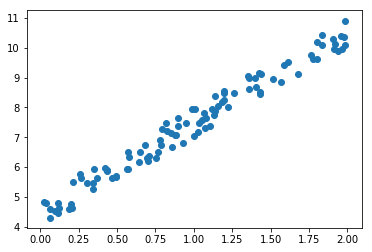

In [8]:
plt.scatter(x,y)

## 使用梯度下降法训练

In [9]:
def J(theta,X_b,y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [10]:
def dJ(theta,X_b,y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1,len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [11]:
def gradient_descent(X_b,y,initial_theta,eta,n_iters = 1e4,epsilon=1e-8):
    
    theta = initial_theta
    i_iter = 0
  
    while i_iter < n_iters:
        gradient = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta - eta * gradient

        if(abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon):
            break
        
        i_iter += 1
    return theta

In [12]:
X_b = np.hstack([np.ones((len(x),1)),x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b,y,initial_theta,eta)
theta

array([4.44278787, 3.03809365])

## 封装我们的线性回归算法

In [13]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X,y)

LinearRegression()

In [14]:
lin_reg.coef_


array([3.03809365])

In [15]:
lin_reg.interception_


4.4427878689011955